In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [2]:
#CARGA DE DATOS

In [3]:
df = pd.read_csv('Wholesale_customers_data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
#REVISION Y ANÁLISIS DE DATOS

In [5]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


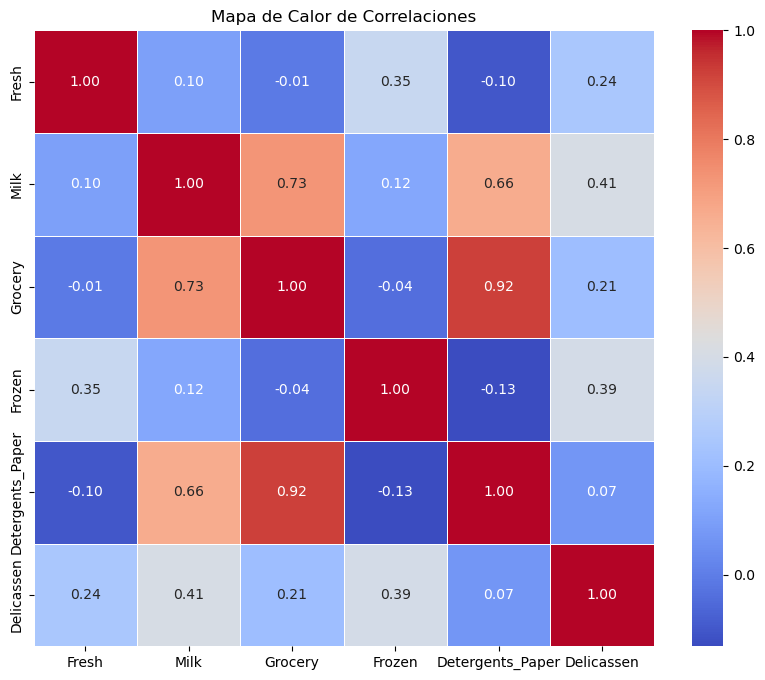

In [7]:
#Desechamos las variables categóricas y nos quedamos con las cuantitativas.
X = df.drop(columns=['Channel', 'Region'])
correlaciones = X.corr()

# Creamos un Heatmap de correlación para entrender mejor los datos.
plt.figure(figsize=(10, 8))  
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [8]:
#ESCALAMOS EL DATA FRAME

In [9]:
scaler=Normalizer().fit(X)
dt=scaler.transform(X)
data = pd.DataFrame(dt, columns=X.columns)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [10]:
#APLICAMOS METODO DEL CODO PARA HALLAR EL VALOR ÓPTIMO DE K EN EL ALGORITMO KMEANS.

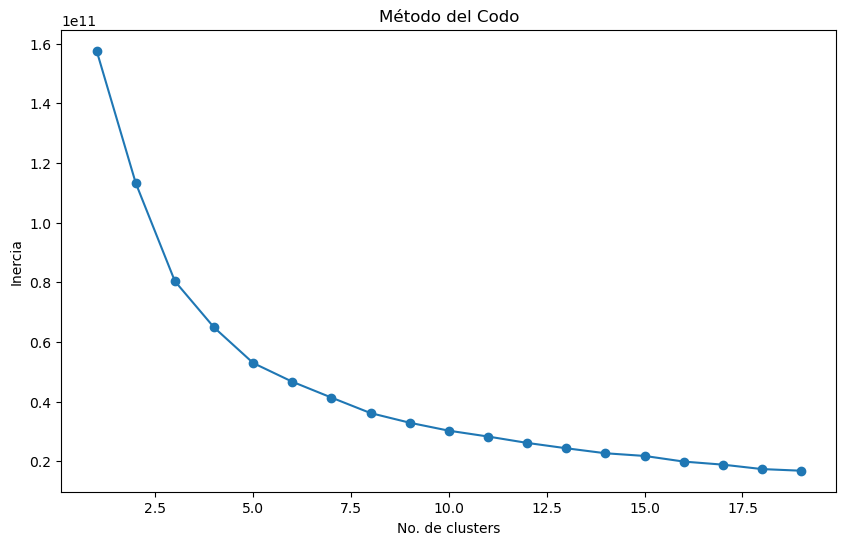

In [11]:
## Hallar el valor óptimo de K ##
#Se aplicará el método de codo para hallar K
#Se calcula el algoritmo de agrupación para diferentes valores de K
inercia = []
for i in range(1, 20):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++',
                       max_iter = 300, n_init = 10)
    algoritmo.fit(X)
    #Para cada K, se calcula la suma total del cuadrado dentro del clúster
    inercia.append(algoritmo.inertia_)
#Se traza la curva de la suma de errores cuadráticos
plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 20)), inercia, marker='o')
plt.show()

In [12]:
## Se aplica el algoritmo de clustering ##
#Se define el algoritmo junto con el valor de K
algoritmo = KMeans(n_clusters = 5, init = 'k-means++',
                   max_iter = 300, n_init = 10)

In [13]:
#Se entrena el algoritmo
algoritmo.fit(X)
#Se obtiene los datos de los centroides y las etiquetas
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

In [14]:
# Se aplica la reducción de dimensionalidad a los datos
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X)

In [15]:
#UNA VEZ TENEMOS LOS DATOS TRANSFORMADOS VAMOS A HACER UN DATA FRAME DE LOS COMPONENTES

In [16]:
dt_components=pd.DataFrame(modelo_pca.components_, columns=data.columns)
dt_components

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.976537,0.121184,0.061540,0.152365,-0.007054,0.068105
1,-0.110614,0.515802,0.764606,-0.018723,0.365351,0.057079


In [17]:
np.cumsum(modelo_pca.explained_variance_ratio_)

array([0.45961362, 0.86478588])

In [18]:
#GRAFICAREMOS Y MOSTRAREMOS LAS EXPLICACIONES DE NUESTROS COMPONENTES EN LAS DIFERENTES DIMENSIONES

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Dimension 1,0.4596,0.9765,0.1212,0.0615,0.1524,-0.0071,0.0681
Dimension 2,0.4052,-0.1106,0.5158,0.7646,-0.0187,0.3654,0.0571


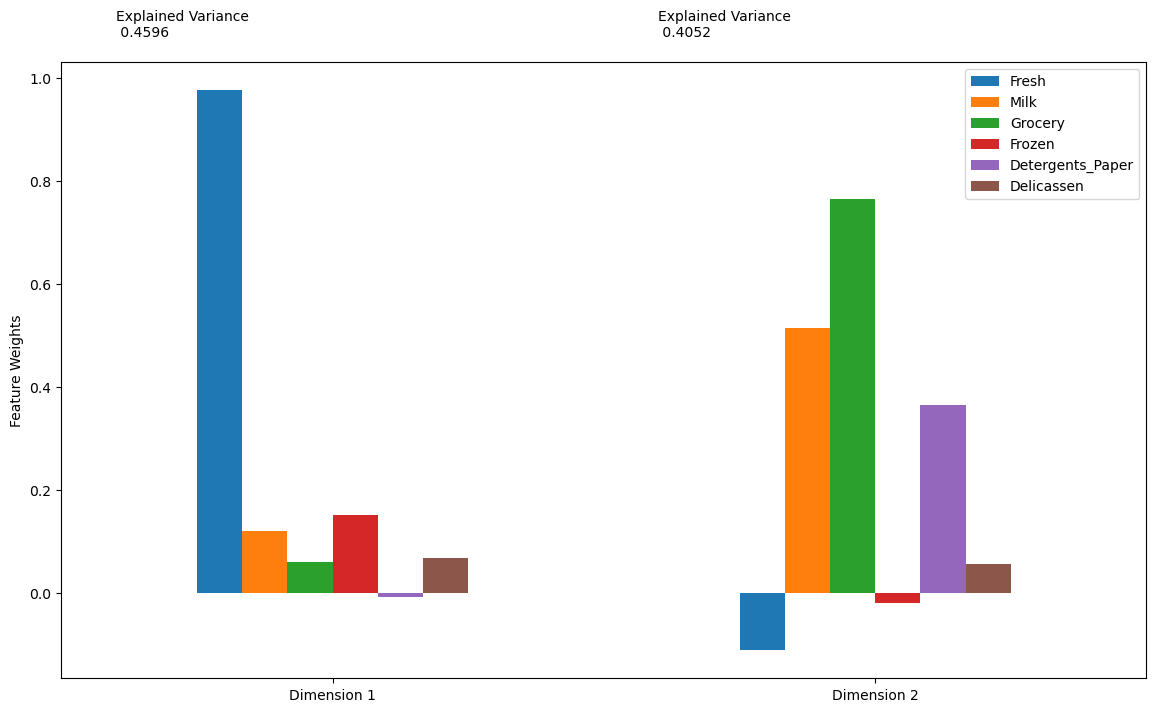

In [19]:
from PCAfunctions import *
pca_results(data, modelo_pca)

/Users/antonioterroncarrasco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


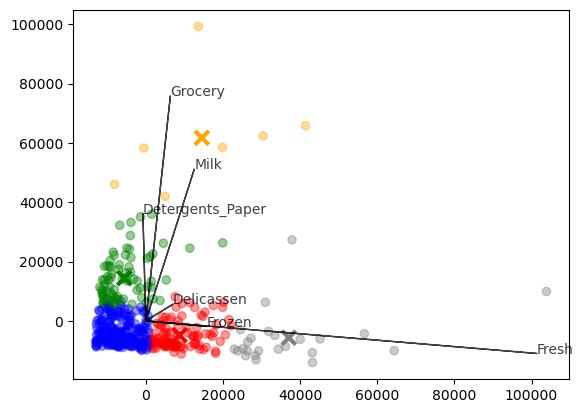

In [21]:
#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

# Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange', 'gray']

#Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster,
            marker = 'o',alpha = 0.4)

#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)

#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data.columns

#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black',
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black',
             alpha=0.75)

plt.show()

### Conclusiones:
Si observamos la gráfica vemos claramente los 5 clústeres representados por distintos colores, verde, rojo, naranja, azul y gris. A su vez, vemos con una X la ubicación del centroide de cada clúster.

Fíjate que algunos clústeres se encuentran concentrados en un mismo lugar, mientras que otros se encuentran más disperso como el amarillo y gris.

A su vez puedes ver una serie de flechas, estas las obtenemos por un código que se desarrollo en Python, pero lo que indican es que son una proyección de cada característica en el eje principal del componente. Estas flechas representan el nivel de importancia de cada característica en la escala multidimensional. Por ejemplo, los congelados y frescos contribuyen más que las otras características.

Es decir, podemos concluir que los productos frescos como frutas y verduras deben colocarse por separado, mientras que los comestibles, detergentes y leche deben colocarse uno al lado del otro, ya que son más factibles de comprarse juntos.

 - Grupo 1: Productos lácteos, comestibles y detergente y papel. Se recomienda encarecidamente que los productos incluidos en este grupo estén disponibles simultáneamente, pero dando prioridad a la cantidad disponible en Leche y Comestibles.


 - Grupo 2: Productos Frescos, Congelados y Delicatessen. Se recomienda encarecidamente que los productos incluidos en este grupo estén disponibles simultáneamente pero priorizando la disponibilidad en Productos Frescos.

En conclusión los datos obtenidos acá deben ser analizados siempre por nosotros, los resultados acá son completamente distintos a los algoritmos de Aprendizaje no Supervisado, que obteníamos un valor como resultado. Inclusive acá no sabemos con seguridad si el resultado obtenido es correcto, por lo que es muy importante entender los datos y sobretodo el proceso en sí de esta forma podrás realizar un análisis final que puedas presentar, ya que con simplemente presentar la gráfica anterior no es suficiente.